In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [2]:
df=pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.shape

(50, 5)

In [5]:
df.rename({'Unnamed: 0': 'State'},axis =1, inplace=True)
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
df.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<Axes: >

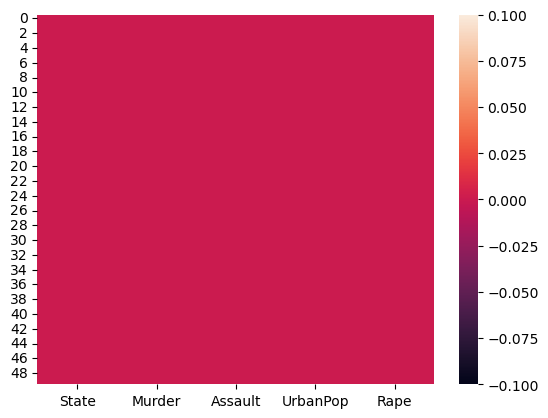

In [8]:
cols= df.columns
sns.heatmap(df[cols].isnull())

In [9]:
df[df.duplicated()]

,State,Murder,Assault,UrbanPop,Rape


In [10]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


C:\Users\vishal\AppData\Local\Temp\ipykernel_5552\1952128230.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Murder)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Murder Rate'}, xlabel='Murder', ylabel='Density'>

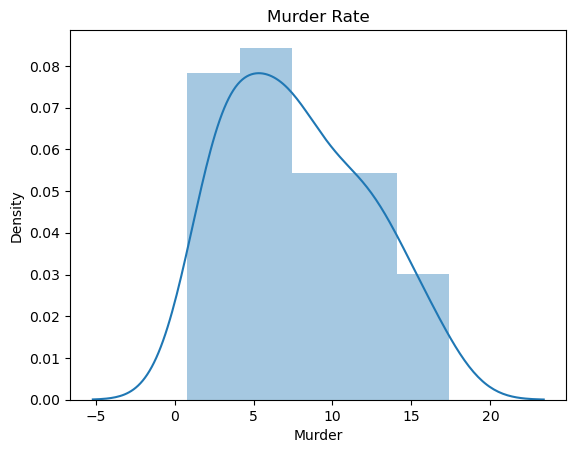

In [11]:
import seaborn as sns
plt.title('Murder Rate')
sns.distplot(df.Murder)

C:\Users\vishal\AppData\Local\Temp\ipykernel_5552\2521022497.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Assault)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Assault Rate'}, xlabel='Assault', ylabel='Density'>

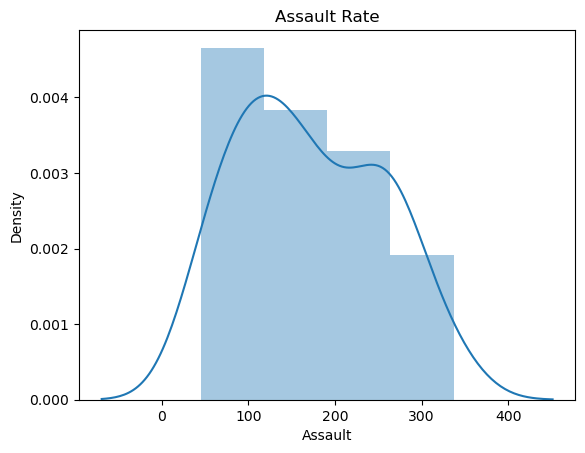

In [12]:
plt.title('Assault Rate')
sns.distplot(df.Assault)

C:\Users\vishal\AppData\Local\Temp\ipykernel_5552\3752496513.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.UrbanPop)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Urban Population'}, xlabel='UrbanPop', ylabel='Density'>

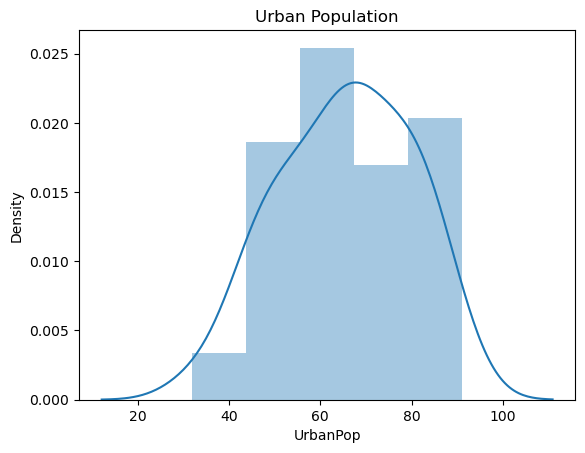

In [13]:
plt.title('Urban Population')
sns.distplot(df.UrbanPop)

C:\Users\vishal\AppData\Local\Temp\ipykernel_5552\591339338.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Rape)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Rape Rate'}, xlabel='Rape', ylabel='Density'>

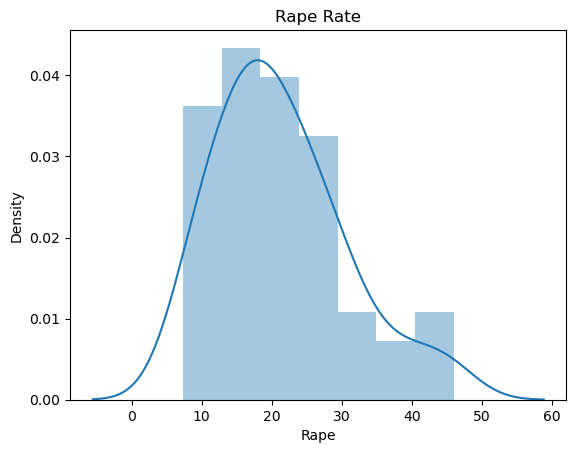

In [14]:
plt.title('Rape Rate')
sns.distplot(df.Rape)

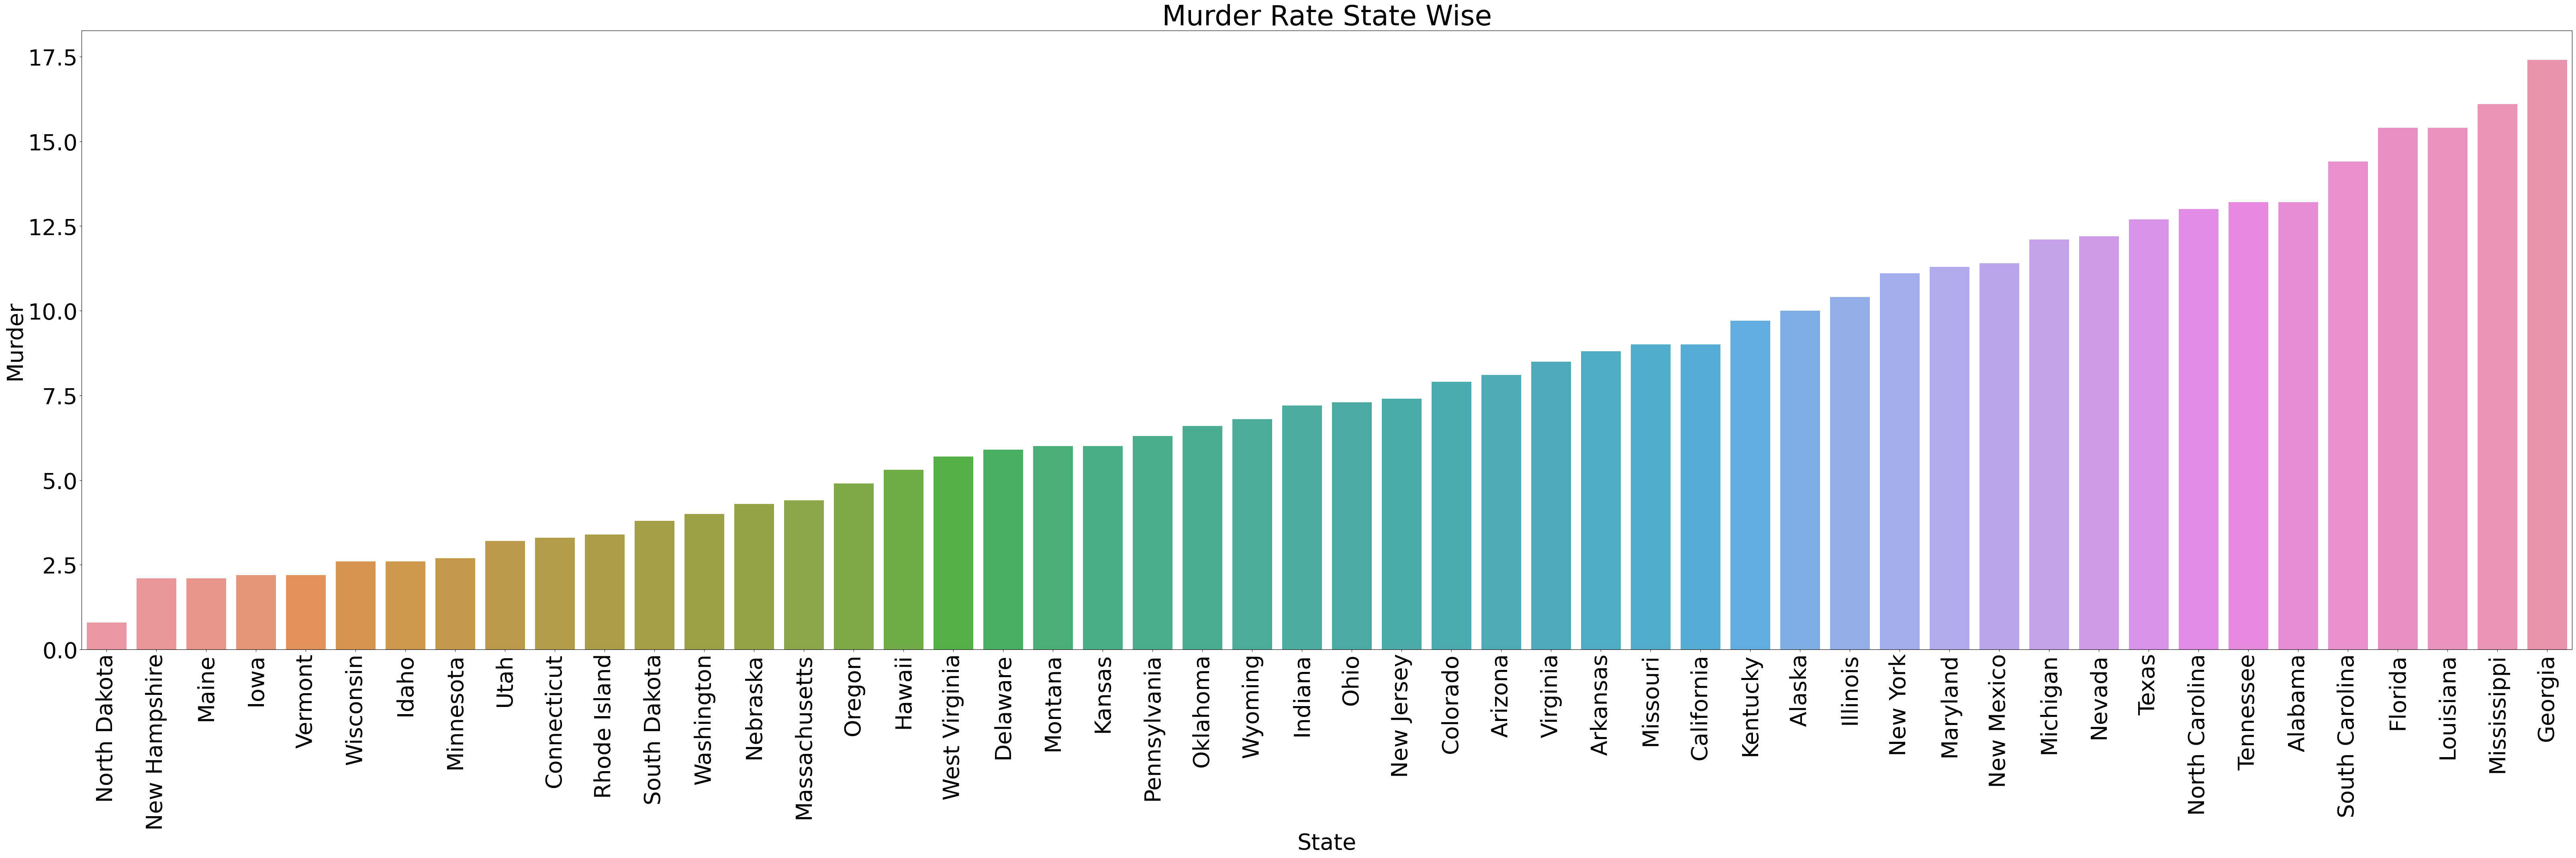

In [15]:
plt.figure(figsize=(80,20))
plt.yticks(rotation=0, fontsize = 40)
plt.xticks(rotation = 90,fontsize=40)
sns.barplot(x=df.State, y = df.Murder, order=df.sort_values('Murder').State)
plt.xlabel('State', size=40)
plt.ylabel('Murder',size=40)
plt.title('Murder Rate State Wise', size=50)
plt.show()

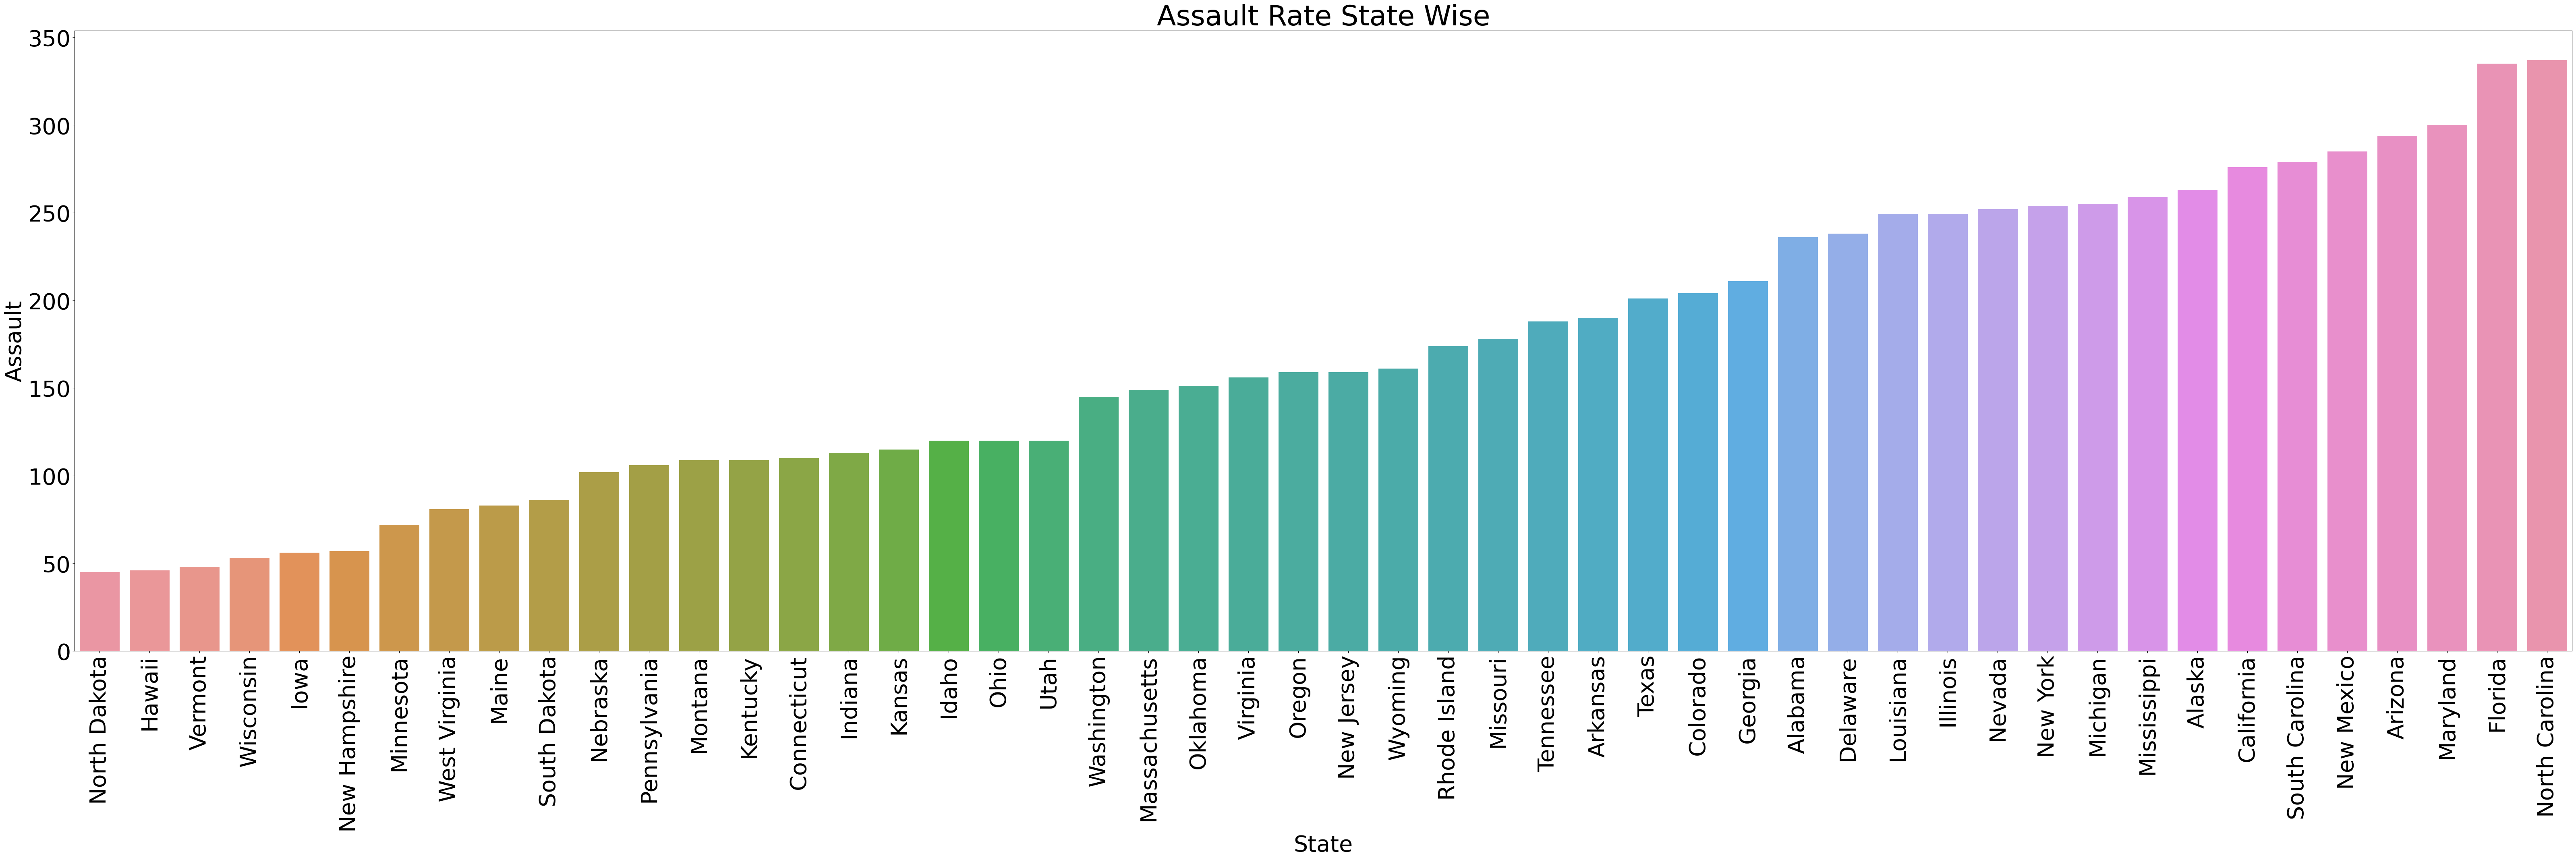

In [16]:
plt.figure(figsize=(80,20))
plt.yticks(rotation=0, fontsize = 40)
plt.xticks(rotation = 90,fontsize=40)
sns.barplot(x=df.State, y = df.Assault, order=df.sort_values('Assault').State)
plt.xlabel('State', size=40)
plt.ylabel('Assault',size=40)
plt.title('Assault Rate State Wise', size=50)
plt.show()

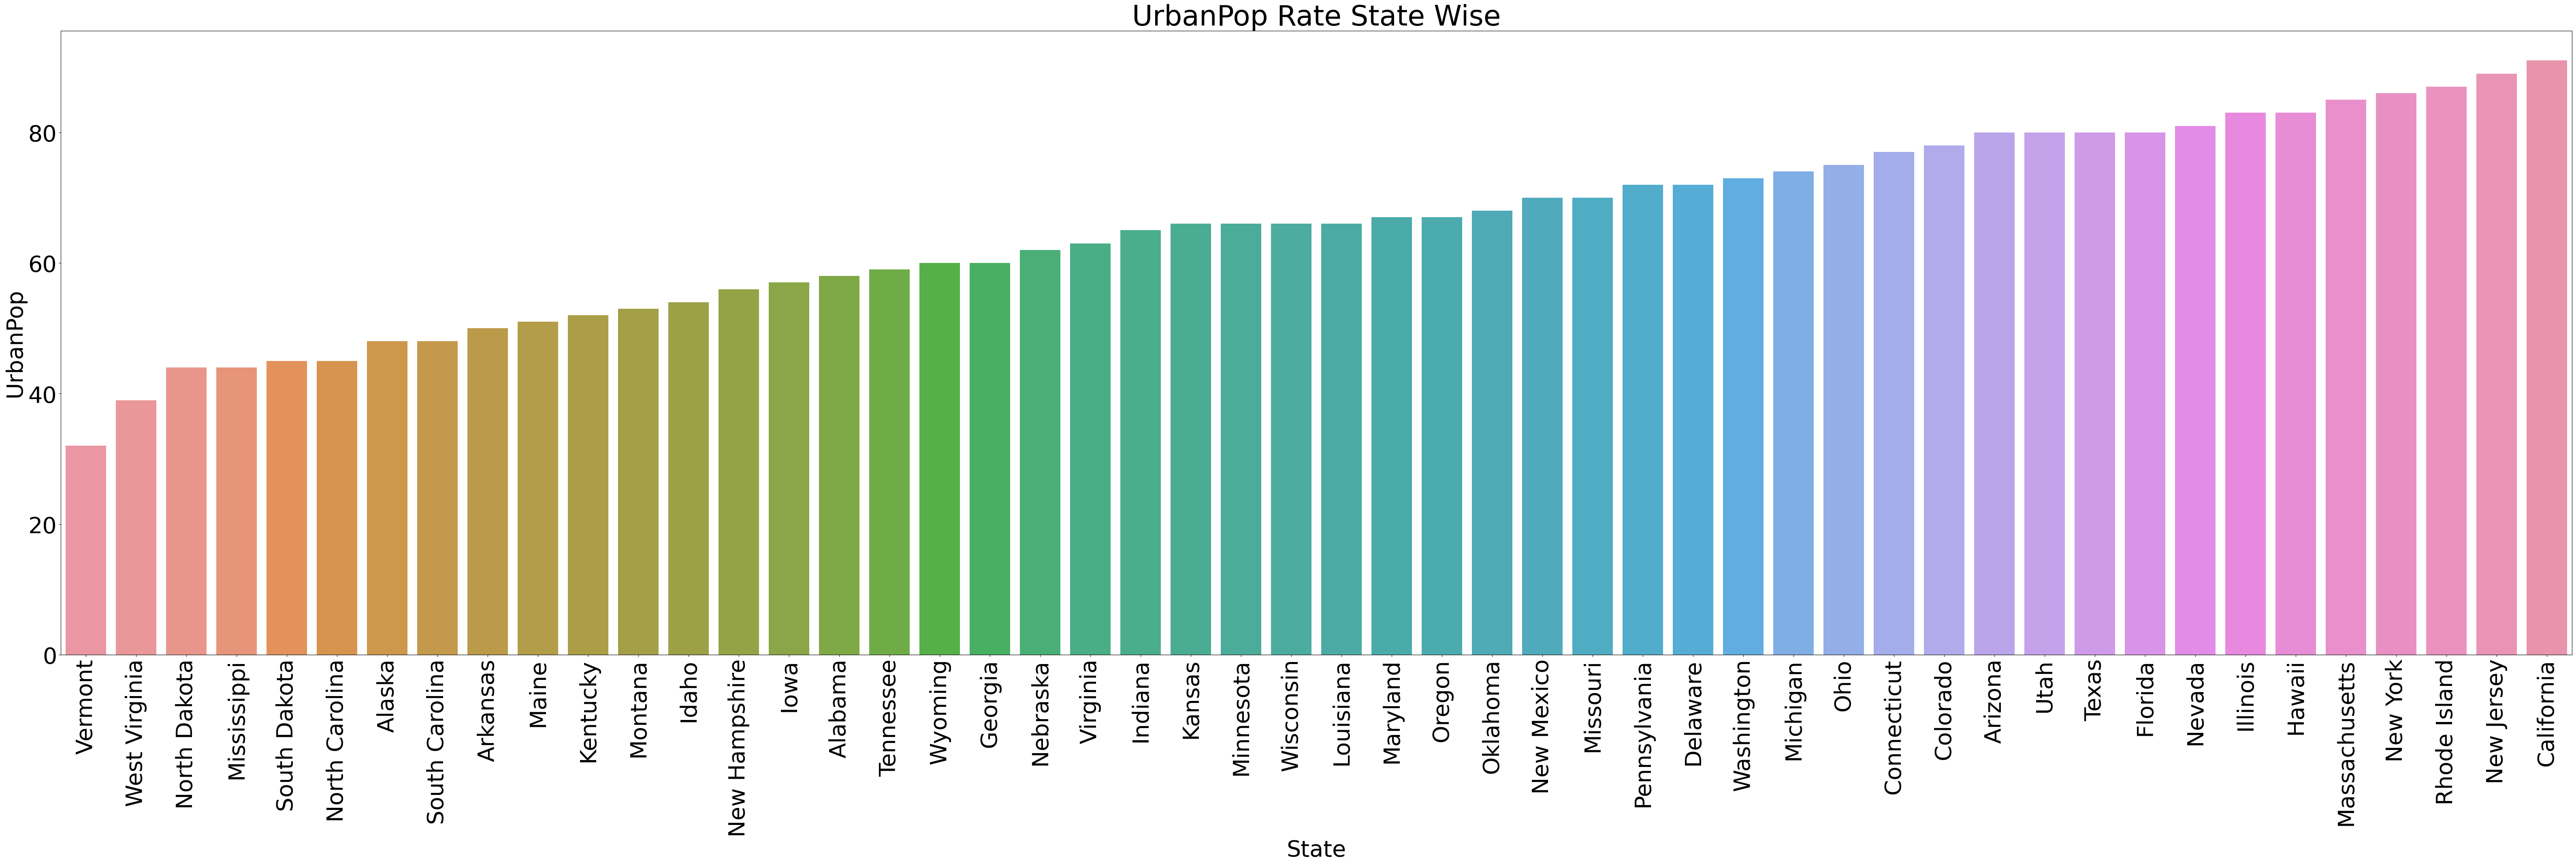

In [17]:
plt.figure(figsize=(80,20))
plt.yticks(rotation=0, fontsize = 40)
plt.xticks(rotation = 90,fontsize=40)
sns.barplot(x=df.State, y = df.UrbanPop, order=df.sort_values('UrbanPop').State)
plt.xlabel('State', size=40)
plt.ylabel('UrbanPop',size=40)
plt.title('UrbanPop Rate State Wise', size=50)
plt.show()

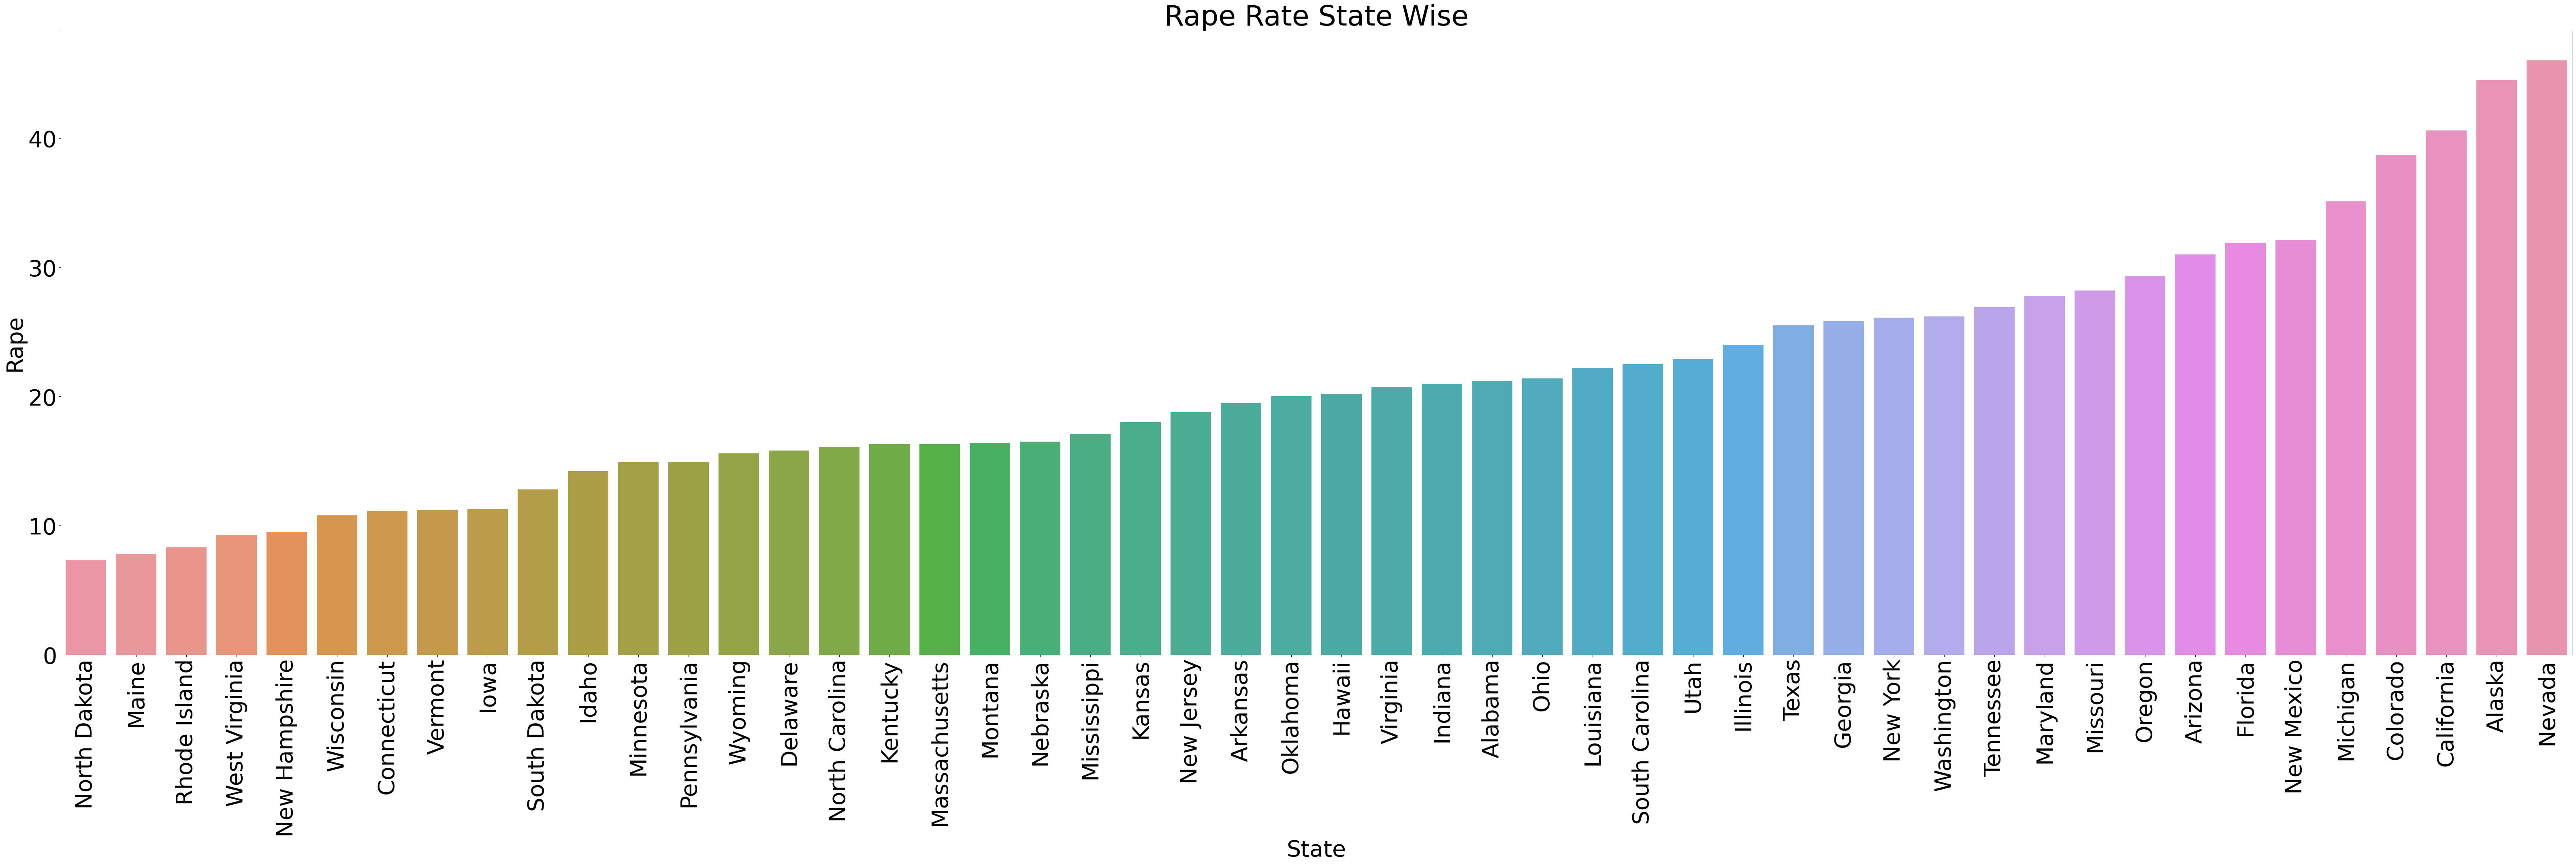

In [18]:
plt.figure(figsize=(80,20))
plt.yticks(rotation=0, fontsize = 40)
plt.xticks(rotation = 90,fontsize=40)
sns.barplot(x=df.State, y = df.Rape, order=df.sort_values('Rape').State)
plt.xlabel('State', size=40)
plt.ylabel('Rape',size=40)
plt.title('Rape Rate State Wise', size=50)
plt.show()

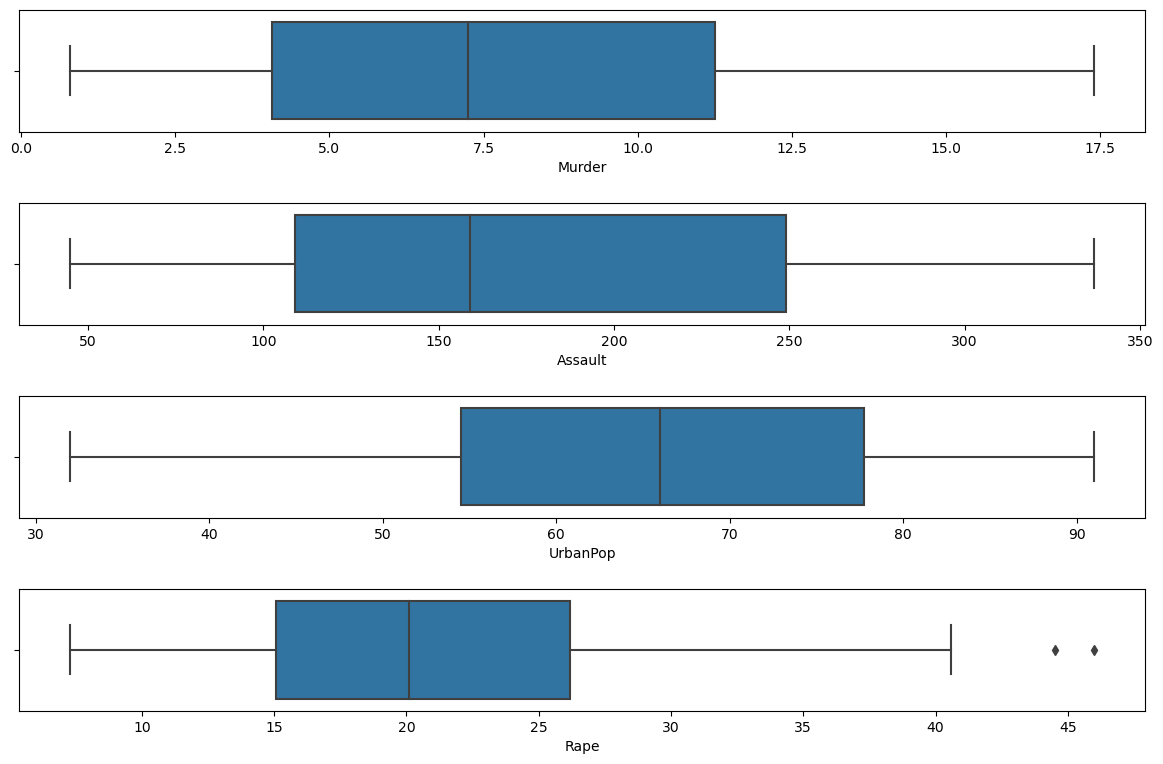

In [19]:
fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=df,ax=axes[0])
sns.boxplot(x='Assault',data=df,ax=axes[1])
sns.boxplot(x='UrbanPop',data=df,ax=axes[2])
sns.boxplot(x='Rape',data=df,ax=axes[3])
plt.tight_layout(pad=2.0)

<Axes: >

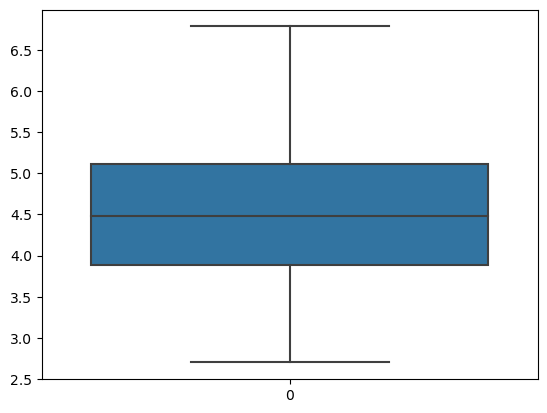

In [20]:
sns.boxplot(np.sqrt(df.Rape))

C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

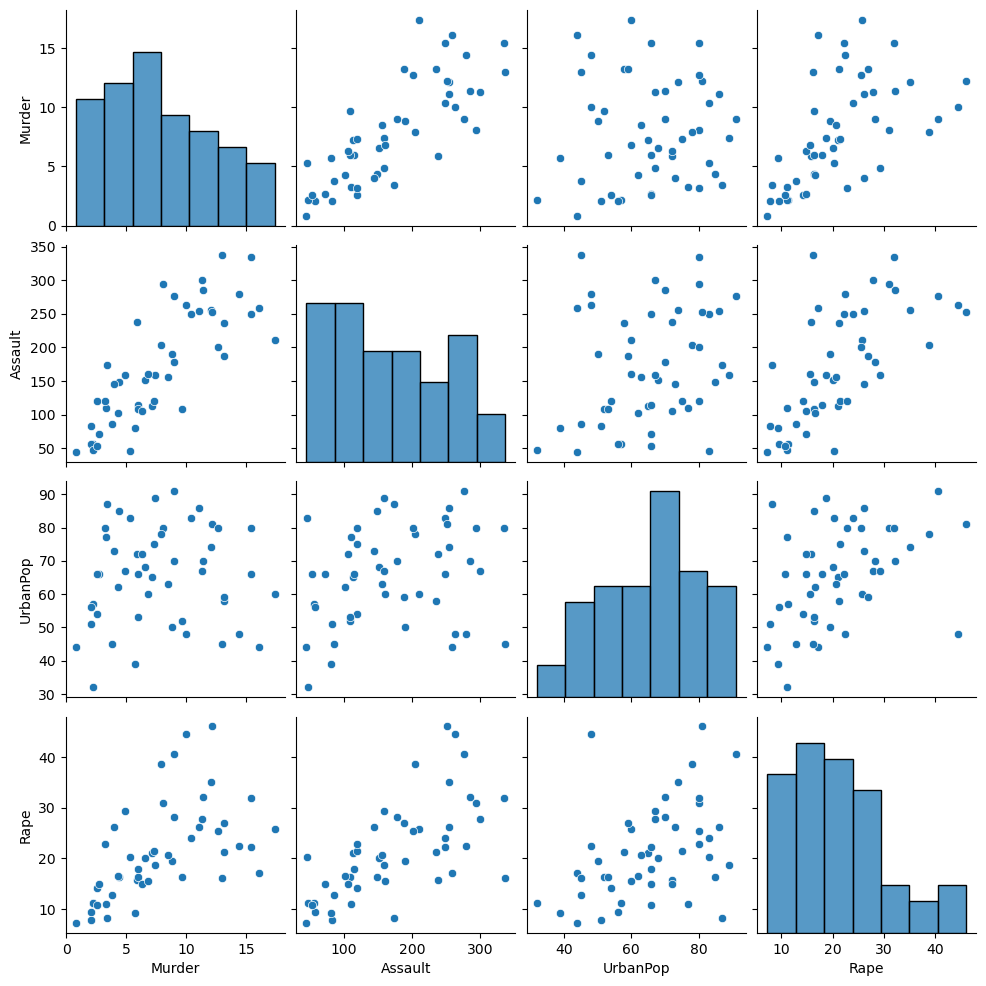

In [21]:
sns.pairplot(df)

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df1= df.drop(['State'], axis=1)
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df1)
std_df.shape

(50, 4)

In [23]:
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(df1)
minmax_df.shape

(50, 4)

# Heirrarchical Clustering

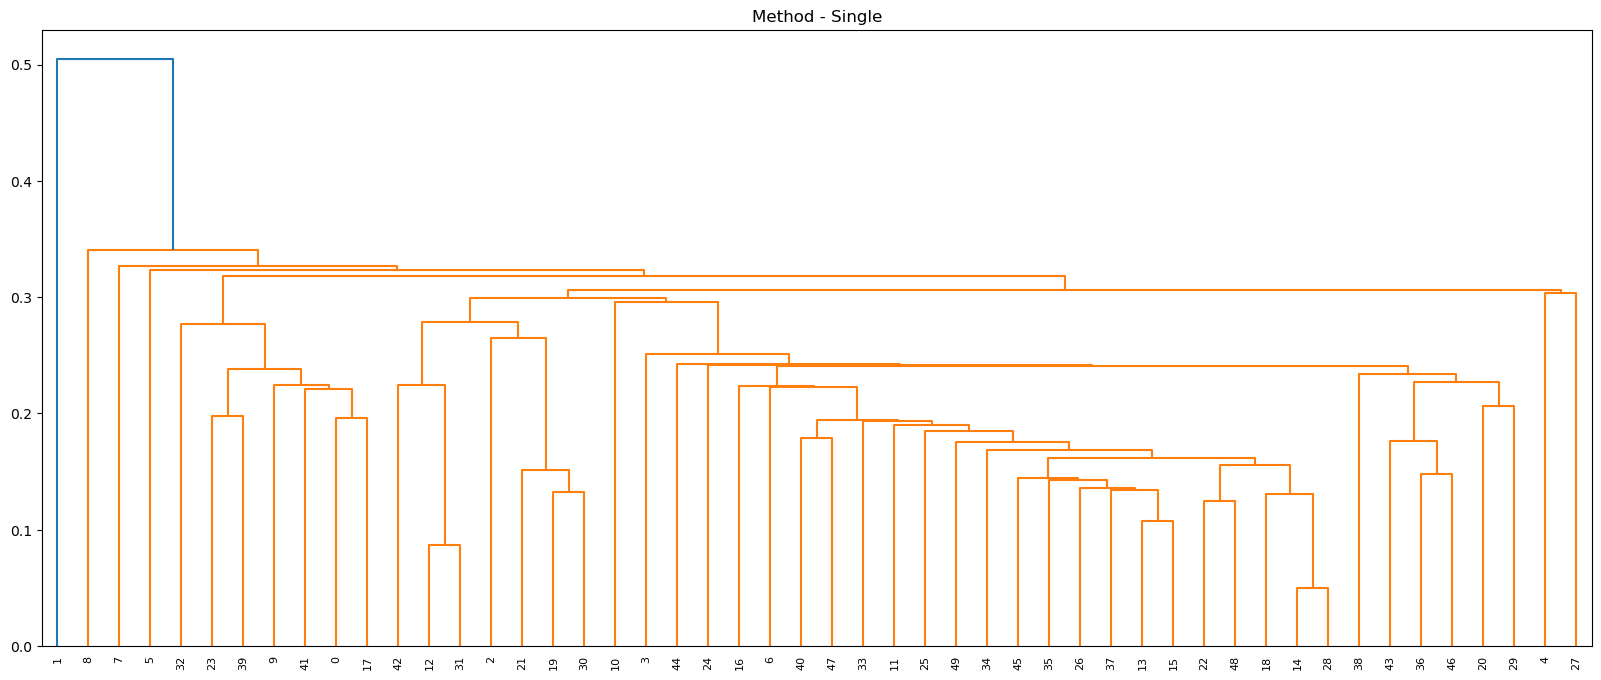

In [24]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='single'))
plt.title("Method - Single")
plt.show()

In [25]:
hc_s = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage= 'single')

In [26]:
y_hc = hc_s.fit_predict(minmax_df)
Clusters_s = pd.DataFrame(y_hc, columns=['Cluster'])

C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [27]:
Clusters_s

,Cluster
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,2
9,0


In [28]:
Clusters_s.value_counts()

Cluster
0          48
1           1
2           1
Name: count, dtype: int64

In [29]:
df['h_clusterid'] = Clusters_s

In [30]:
df

,State,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [31]:
df.groupby('h_clusterid').agg(['count']).reset_index()

,h_clusterid,State,Murder,Assault,UrbanPop,Rape
,,count,count,count,count,count
0,0,48,48,48,48,48
1,1,1,1,1,1,1
2,2,1,1,1,1,1


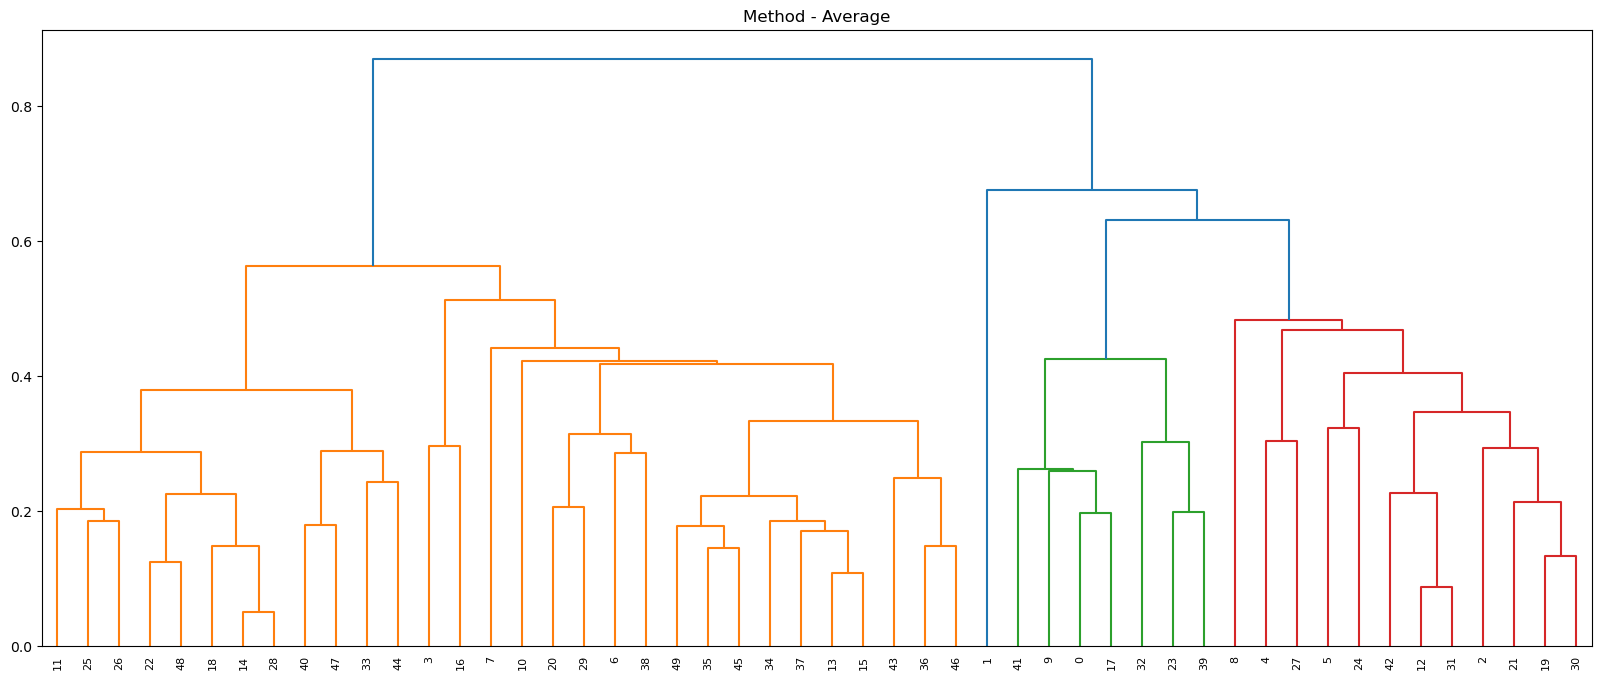

In [32]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='average'))
plt.title("Method - Average")
plt.show()

In [33]:
hc_a = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage= 'average')

In [34]:
y_hc = hc_a.fit_predict(minmax_df)
Clusters_a = pd.DataFrame(y_hc, columns=['Clusters'])

C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [35]:
Clusters_a

,Clusters
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [36]:
df['h_clusterid'] = Clusters_a
Clusters_a.value_counts()

Clusters
1           30
0           20
Name: count, dtype: int64

In [37]:
df

,State,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [38]:
df.groupby('h_clusterid').agg(['count']).reset_index()

,h_clusterid,State,Murder,Assault,UrbanPop,Rape
,,count,count,count,count,count
0,0,20,20,20,20,20
1,1,30,30,30,30,30


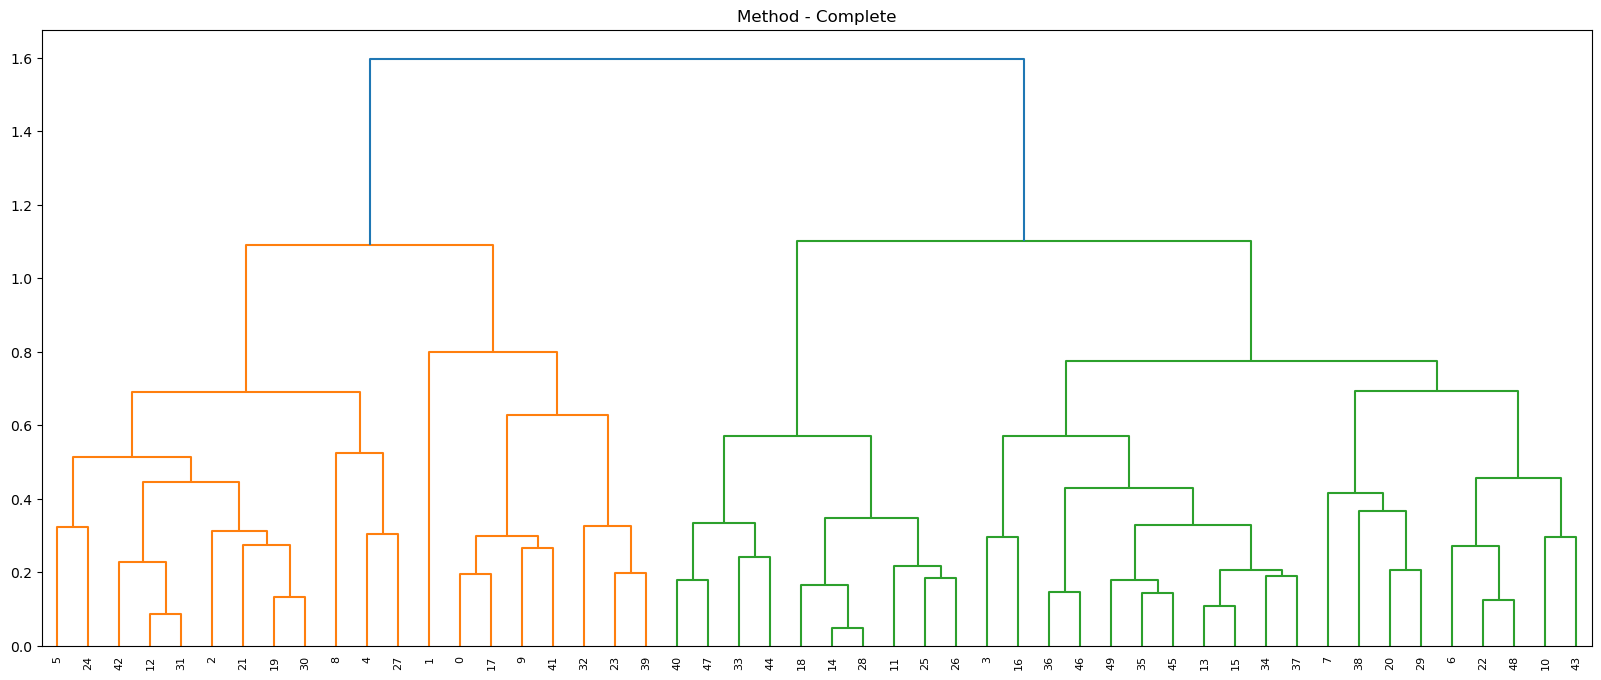

In [39]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='complete'))
plt.title("Method - Complete")
plt.show()

In [40]:
hc_c = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage= 'complete')

In [41]:
y_hc = hc_c.fit_predict(minmax_df)
Clusters_c = pd.DataFrame(y_hc, columns=['Clusters'])

C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [42]:
Clusters_c

,Clusters
0,1
1,1
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,1


In [43]:
df['h_clusterid'] = Clusters_c
Clusters_c.value_counts()

Clusters
0           30
1           20
Name: count, dtype: int64

In [44]:
df

,State,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [45]:
df.groupby('h_clusterid').agg(['count']).reset_index()

,h_clusterid,State,Murder,Assault,UrbanPop,Rape
,,count,count,count,count,count
0,0,30,30,30,30,30
1,1,20,20,20,20,20


# K-Means Clustering

C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

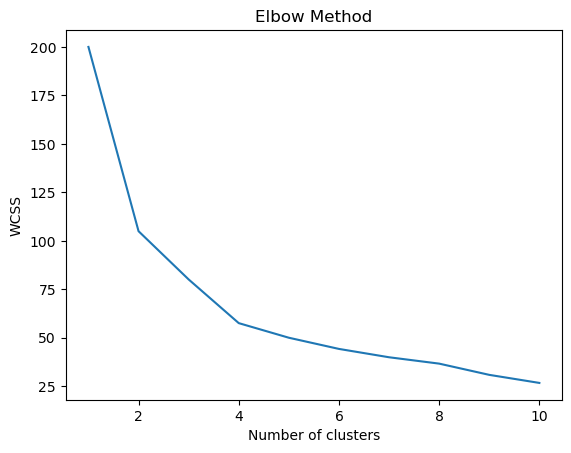

In [46]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, random_state = 0)
        kmeans.fit(std_df)
        wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
from pandas.core.common import random_state
clusters_new = KMeans(4, random_state=32)
clusters_new.fit(std_df)

C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=32)

In [48]:
clusters_new.labels_

array([2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 0, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0])

In [49]:
df1['h_clusterid'] = clusters_new.labels_

In [50]:
df1

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,2


In [51]:
df1.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.852941,141.176471,73.647059,19.335294
1,1,3.600000,78.538462,52.076923,12.176923
2,2,13.937500,243.625000,53.750000,21.412500
3,3,10.966667,264.000000,76.500000,33.608333


# DBSCAN

In [52]:
from sklearn.cluster import DBSCAN

In [53]:
df_d=pd.read_csv('crime_data.csv')

In [54]:
dbscan = DBSCAN(eps = 1.25, min_samples=3)
dbscan.fit(std_df)

DBSCAN(eps=1.25, min_samples=3)

In [55]:
dbscan.labels_

array([ 0, -1,  1,  1, -1,  1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [56]:
cl = pd.DataFrame(dbscan.labels_, columns=['clusters'])

In [57]:
cl

,clusters
0,0
1,-1
2,1
3,1
4,-1
5,1
6,1
7,1
8,-1
9,0


In [58]:
df_d=pd.concat([df_d,cl], axis=1)
df_d.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1


In [59]:
df_d['clusters'].value_counts()

clusters
 1    39
 0     7
-1     4
Name: count, dtype: int64

In [60]:
df_d.groupby('clusters').agg(['count']).reset_index()

,clusters,Unnamed: 0,Murder,Assault,UrbanPop,Rape
,,count,count,count,count,count
0,-1,4,4,4,4,4
1,0,7,7,7,7,7
2,1,39,39,39,39,39


In [61]:
df2= df_d.drop(['Unnamed: 0'], axis=1)
df2

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0


In [62]:
df2.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.650000,281.500000,75.000000,40.750000
1,0,14.671429,251.285714,54.285714,21.685714
2,1,6.156410,144.948718,66.589744,19.148718


# End Assignment